# Monotone least squares

In [1]:
from mpart import *
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# geometry
num_points = 1000
xmin, xmax = 0, 4
x = np.linspace(xmin, xmax, num_points)[None,:]

In [3]:
# Take measurements of step function, note: data might 
# not monotone because of the noise, but we assume the 
# true underlying function is monotone.
noisesd = 0.4
y_true = 2*(x>2)
y_noise = noisesd*np.random.randn(num_points) 
y_measured = y_true + y_noise

In [4]:
# Create multi-index set:
multis = np.array([[0], [1], [2], [3], [4], [5]])
mset = MultiIndexSet(multis)
fixed_mset = mset.fix(True)

In [5]:
# Set options and make regression function
opts = MapOptions()
monotone_map = CreateComponent(fixed_mset, opts)

In [6]:
# Least squares objective
def objective(coeffs, monotone_map, x, y_measured):
    monotone_map.SetCoeffs(coeffs)
    map_of_x = monotone_map.Evaluate(x)
    return np.sum((map_of_x - y_measured)**2)/x.shape[1]

In [7]:
# gradient of objective
def grad_objective(coeffs, monotone_map, x, y_measured):
    monotone_map.SetCoeffs(coeffs)
    map_of_x = monotone_map.Evaluate(x)
    return 2*np.sum(monotone_map.CoeffGrad(x, map_of_x - y_measured),1)/x.shape[1]

In [8]:
# Before optimization
map_of_x_before = monotone_map.Evaluate(x)
error_before = objective(monotone_map.CoeffMap(), monotone_map, x, y_measured)

In [9]:
# Optimize
optimizer_options={'gtol': 1e-4, 'disp': True}
res = minimize(objective, monotone_map.CoeffMap(), args=(monotone_map, x, y_measured), jac=grad_objective, method='BFGS', options=optimizer_options)

         Current function value: 0.193319
         Iterations: 32
         Function evaluations: 108
         Gradient evaluations: 102


In [10]:
# After optimization
map_of_x_after = monotone_map.Evaluate(x)
error_after = objective(monotone_map.CoeffMap(), monotone_map, x, y_measured)

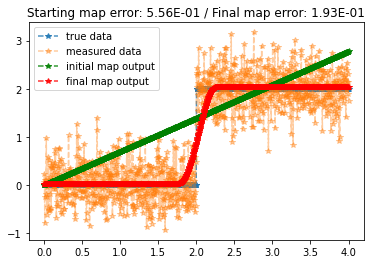

In [11]:
# Plot data (before and after together)
plt.figure()
plt.title('Starting map error: {:.2E} / Final map error: {:.2E}'.format(error_before, error_after))
plt.plot(x.flatten(),y_true.flatten(),'*--',label='true data', alpha=0.8)
plt.plot(x.flatten(),y_measured.flatten(),'*--',label='measured data', alpha=0.4)
plt.plot(x.flatten(),map_of_x_before.flatten(),'*--',label='initial map output', color="green", alpha=0.8)
plt.plot(x.flatten(),map_of_x_after.flatten(),'*--',label='final map output', color="red", alpha=0.8)
plt.legend()
plt.show()

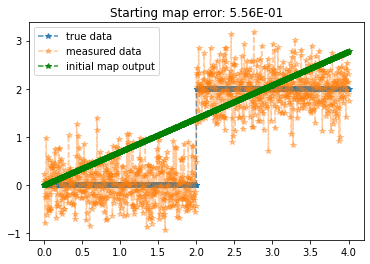

In [12]:
# Plot data (before and after apart)
plt.figure()
plt.title('Starting map error: {:.2E}'.format(error_before))
plt.plot(x.flatten(),y_true.flatten(),'*--',label='true data', alpha=0.8)
plt.plot(x.flatten(),y_measured.flatten(),'*--',label='measured data', alpha=0.4)
plt.plot(x.flatten(),map_of_x_before.flatten(),'*--',label='initial map output', color="green", alpha=0.8)
plt.legend()
plt.show()

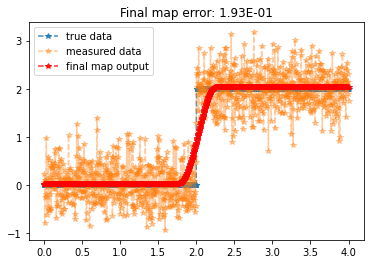

In [13]:
plt.figure()
plt.title('Final map error: {:.2E}'.format(error_after))
plt.plot(x.flatten(),y_true.flatten(),'*--',label='true data', alpha=0.8)
plt.plot(x.flatten(),y_measured.flatten(),'*--',label='measured data', alpha=0.4)
plt.plot(x.flatten(),map_of_x_after.flatten(),'*--',label='final map output', color="red", alpha=0.8)
plt.legend()
plt.show()